## Cartpole

In [1]:
using TrajectoryOptimization
using Plots, LinearAlgebra, MeshCat, MeshCatMechanisms, RigidBodyDynamics, GeometryTypes, CoordinateTransformations

┌ Info: Recompiling stale cache file /home/taylor/.julia/compiled/v1.1/MeshCat/CZdjb.ji for MeshCat [283c5d60-a78f-5afe-a0af-af636b173e11]
└ @ Base loading.jl:1184


HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/c443b012d0ad3ce8e6cc9de306cd3766b1d18a79-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/c443b012d0ad3ce8e6cc9de306cd3766b1d18a79-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

┌ Info: Recompiling stale cache file /home/taylor/.julia/compiled/v1.1/MeshCatMechanisms/dGmNl.ji for MeshCatMechanisms [6ad125db-dd91-5488-b820-c1df6aab299d]
└ @ Base loading.jl:1184


Get path to urdf file

In [2]:
traj_folder = joinpath(dirname(pathof(TrajectoryOptimization)),"..")
urdf_folder = joinpath(traj_folder, "dynamics/urdf")
urdf = joinpath(urdf_folder, "cartpole.urdf");

Load cartpole model

In [4]:
model = Dynamics.cartpole_urdf
model_d = rk3(model)
n = model.n
m = model.m;

Define numerical type

In [5]:
T = Float64;

Define initial and goal states

In [6]:
x0 = [0.0;-pi;0.0;0.0]
xf = [0.0;0.;0.0;0.0]

4-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0

Define costs 

In [7]:
Q = 0.01*Diagonal(I,n)
Qf = 1000.0*Diagonal(I,n)
R = 0.01*Diagonal(I,m)

1×1 Diagonal{Float64,Array{Float64,1}}:
 0.01

Create terminal constraints

In [8]:
goal = goal_constraint(xf);

Create problem

In [9]:
N = 201
dt = 0.01
tf = (N-1)*dt

U = [ones(m) for k = 1:N-1]

obj = LQRObjective(Q,R,Qf,xf,N)
constraints = Constraints(N)
constraints[N] += goal

prob = Problem(model_d,obj,constraints=constraints,x0=x0,N=N,dt=dt,xf=xf)
initial_controls!(prob, U);

Solver options

In [10]:
opts_ilqr = iLQRSolverOptions(verbose=true, 
    cost_tolerance=1.0e-6)

opts_al = AugmentedLagrangianSolverOptions{T}(verbose=false,
    opts_uncon=opts_ilqr,
    iterations=30,
    penalty_scaling=10.0, 
    cost_tolerance=1.0e-6,
    cost_tolerance_intermediate=1.0e-5,
    constraint_tolerance=1.0e-4)

opts_altro = ALTROSolverOptions{T}(verbose=false,
    opts_al=opts_al);

Solve problem

In [11]:
solve!(prob, opts_altro); # solve with ALTRO

┌ Info: Augmented Lagrangian solve...
└ @ TrajectoryOptimization /home/taylor/.julia/dev/TrajectoryOptimization/src/altro.jl:24
    iter cost          expected    z         α         ρ         dJ        grad      zero_count info                                              
____----------------------------------------------------------------------------------------------------------------------------------------------
    1     3287.6162675  2169.07469  0.777112  0.25      0e+00     1685.615  34.09763 0          
    2     2539.2351284  764.667384  0.978702  0.125     0e+00     748.3811  17.78213 0          
    3     2045.8823498  590.156106  0.83597   0.125     0e+00     493.3528  14.71331 0          
    4     1640.0155743  472.07018   0.859759  0.125     0e+00     405.8668  12.83515 0          
    5     1302.9851099  375.594059  0.897326  0.125     0e+00     337.0305  9.611852 0          
    6     1076.005069   553.105036  0.410374  0.25      0e+00     226.98    8.864043 0       

    65    18.820170368  0.2083077   0.49373   0.03125   0e+00     0.102848  0.856323 0          
    66    18.795425627  0.05484306  0.451192  0.0625    0e+00     0.024745  0.361687 0          
    67    18.705106521  0.14440022  0.625478  0.5       0e+00     0.090319  0.228795 0          
    68    18.670625335  0.14342825  0.240407  0.0625    0e+00     0.034481  0.460236 0          
    69    18.667099161  0.0755615   0.046666  0.25      0e+00     0.003526  0.249341 0          
    70    18.638614075  0.11936057  0.238647  0.0625    0e+00     0.028485  0.41922  0          
    iter cost          expected    z         α         ρ         dJ        grad      zero_count info                                              
____----------------------------------------------------------------------------------------------------------------------------------------------
    71    18.627073506  0.07144434  0.161532  0.25      0e+00     0.011541  0.241458 0          
    72    18.601282522  0.0

    130   18.099075007  0.00575921  0.140234  0.125     0e+00     0.000808  0.058466 0          
    iter cost          expected    z         α         ρ         dJ        grad      zero_count info                                              
____----------------------------------------------------------------------------------------------------------------------------------------------
    131   18.098194038  0.00674136  0.130681  0.125     0e+00     0.000881  0.078147 0          
    132   18.097656069  0.00797093  0.067491  0.125     0e+00     0.000538  0.071803 0          
    133   18.096902385  0.00945953  0.079674  0.125     0e+00     0.000754  0.094844 0          
    134   18.096846378  0.0113212   0.004947  0.125     0e+00     5.6e-05   0.088925 0          
    135   18.096312341  0.01361127  0.039235  0.125     0e+00     0.000534  0.116285 0          
    136   18.092230865  0.0085172   0.479204  0.0625    0e+00     0.004081  0.108431 0          
    137   18.089657391  0.0

    7     18.067611936  0.00124791  0.022367  1         0e+00     2.79e-05  0.010158 0          
    8     18.065956438  0.00333347  0.496629  0.0625    0e+00     0.001655  0.066037 0          
    9     18.06576616   0.00039098  0.486675  0.5       0e+00     0.00019   0.006464 0          
    10    18.065691168  0.00107382  0.069837  0.125     0e+00     7.5e-05   0.025561 0          
    iter cost          expected    z         α         ρ         dJ        grad      zero_count info                                              
____----------------------------------------------------------------------------------------------------------------------------------------------
    11    18.065608321  0.00118532  0.069894  0.125     0e+00     8.28e-05  0.030655 0          
    12    18.065547553  0.00131064  0.046365  0.125     0e+00     6.08e-05  0.02859  0          
    13    18.065472683  0.00145116  0.051593  0.125     0e+00     7.49e-05  0.03427  0          
    14    18.065429459  0.0

    iter cost          expected    z         α         ρ         dJ        grad      zero_count info                                              
____----------------------------------------------------------------------------------------------------------------------------------------------
    1     18.288376569  0.0365856   0.305353  0.5       0e+00     0.011172  0.06659  0          
    2     18.267955608  0.04729061  0.431818  0.0625    0e+00     0.020421  0.298293 0          
    3     18.265685827  0.00718896  0.315731  0.25      0e+00     0.00227   0.058832 0          
    4     18.265658335  0.01347507  0.00204   0.125     0e+00     2.75e-05  0.114946 0          
    5     18.265398753  0.01513479  0.017151  0.125     0e+00     0.00026   0.130248 0          
    6     18.261207036  0.0089675   0.467434  0.0625    0e+00     0.004192  0.13381  0          
    7     18.25845748   0.00451229  0.609349  0.5       0e+00     0.00275   0.034348 0          
    8     18.256882993  0.0

Plot state trajectory

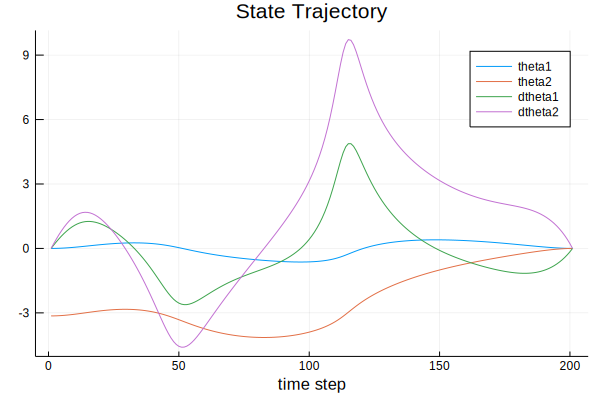

In [12]:
plot(prob.X,xlabel="time step",title="State Trajectory",label=["theta1" "theta2" "dtheta1" "dtheta2"])

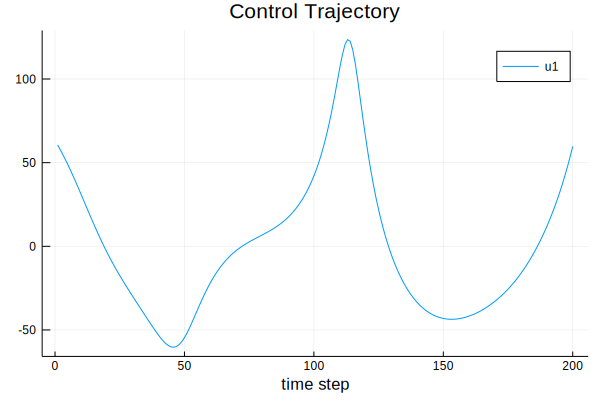

In [13]:
plot(prob.U,xlabel="time step",title="Control Trajectory",label=["u1" "u2"])

Visualizer

In [14]:
vis = Visualizer()
# open(vis)
IJuliaCell(vis)

WebIO.Scope("scope-6a1dcb22-da0f-4b4b-8681-b6712dfcd3df", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :iframe), Any[], Dict{Symbol,Any}(:attributes=>Dict{String,Any}("height"=>"100%","scrolling"=>"no","src"=>"javascript:void(0)","frameborder"=>0),:id=>"ifr",:style=>Dict("width"=>"100%","flexGrow"=>"1")), 0)], Dict{Symbol,Any}(:style=>Dict("flexDirection"=>"column","height"=>"100%","minHeight"=>"400px","display"=>"flex","width"=>"100%","overflow"=>"hidden")), 1), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}(), Set(String[]), nothing, Any[], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function () {\n    var frame = this.dom.querySelector(\"#ifr\");\n    var doc = frame.contentDocument\n    var win = frame.contentWindow\n\n    // Ensure that the iframe's baseURI matches the baseURI of the\n    // outer document. This is necessary to resolve\n    // https://github.com/JuliaGizmos/WebIO.jl/issues/167\n    var base = doc.createElement(\"base\");\n    base.setAttribute(\"href\", document.baseURI);\n    doc.head.appendChild(base);\n\n    var webio = doc.createElement(\"script\")\n    webio.src = \"/assetserver/c443b012d0ad3ce8e6cc9de306cd3766b1d18a79-assets/webio/dist/bundle.js\"\n    var parent = window\n\n    function resizeIframe() {\n        doc.body.style.padding = '0'\n        doc.body.style.margin = '0'\n        doc.documentElement.height = '100%'\n        doc.body.height = '100%'\n    }\n\n    webio.onload = function () {\n        win.WebIO.sendCallback = parent.WebIO.sendCallback; // Share stuff\n        win.WebIO.scopes = parent.WebIO.scopes\n        win.WebIO.obsscopes = parent.WebIO.obsscopes\n        win.WebIO._connected = true\n        doc.body.innerHTML = \"<html><body>\" + \"<div class='display:none'></div><unsafe-script style='display:none'>\\nWebIO.mount(this.previousSibling,{&quot;props&quot;:{},&quot;nodeType&quot;:&quot;Scope&quot;,&quot;type&quot;:&quot;node&quot;,&quot;instanceArgs&quot;:{&quot;imports&quot;:{&quot;data&quot;:[{&quot;name&quot;:null,&quot;type&quot;:&quot;js&quot;,&quot;url&quot;:&quot;/assetserver/487683c7b8bd883c883fabebf1cb3fede18f15f7-main.min.js&quot;}],&quot;type&quot;:&quot;async_block&quot;},&quot;id&quot;:&quot;scope-9cc4ad18-f600-4fd6-8e09-a2c3875d8841&quot;,&quot;handlers&quot;:{&quot;meshcat-command&quot;:[(function (val){return this.viewer.handle_command_message({&quot;data&quot;:val})})],&quot;_promises&quot;:{&quot;importsLoaded&quot;:[(function (mc){var element=this.dom.children[0]; this.viewer=new mc.Viewer(element); WebIO.setval({&quot;name&quot;:&quot;meshcat-request&quot;,&quot;scope&quot;:&quot;scope-9cc4ad18-f600-4fd6-8e09-a2c3875d8841&quot;,&quot;id&quot;:&quot;ob_02&quot;,&quot;type&quot;:&quot;observable&quot;},String(Date.now())); window.document.body.style.margin=&quot;0&quot;; return window.meshcat_viewer=this.viewer})]}},&quot;systemjs_options&quot;:null,&quot;observables&quot;:{&quot;meshcat-command&quot;:{&quot;sync&quot;:false,&quot;id&quot;:&quot;ob_01&quot;,&quot;value&quot;:[]},&quot;meshcat-controls&quot;:{&quot;sync&quot;:true,&quot;id&quot;:&quot;ob_03&quot;,&quot;value&quot;:[]},&quot;meshcat-request&quot;:{&quot;sync&quot;:true,&quot;id&quot;:&quot;ob_02&quot;,&quot;value&quot;:&quot;&quot;}}},&quot;children&quot;:[{&quot;props&quot;:{&quot;className&quot;:&quot;meshcat-viewer&quot;,&quot;style&quot;:{&quot;left&quot;:0,&quot;right&quot;:0,&quot;overflow&quot;:&quot;hidden&quot;,&quot;position&quot;:&quot;absolute&quot;,&quot;height&quot;:&quot;100vh&quot;,&quot;margin&quot;:0,&quot;width&quot;:&quot;100vw&quot;}},&quot;nodeType&quot;:&quot;DOM&quot;,&quot;type&quot;:&quot;node&quot;,&quot;instanceArgs&quot;:{&quot;namespace&quot;:&quot;html&quot;,&quot;tag&quot;:&quot;div&quot;},&quot;children&quot;:[]}]})</unsafe-script>\" + \"</body></html>\";\n        setTimeout(function () { resizeIframe() }, 0)\n    }\n\n    doc.body.appendChild(webio)\n}"), JSString("(function (){retur

Create mechanism

In [15]:
robot = RigidBodyDynamics.parse_urdf(T, urdf)
mvis = MechanismVisualizer(robot, URDFVisuals(urdf), vis);

In [16]:
# Set camera location
settransform!(vis["/Cameras/default"], compose(Translation(0.,-.75,0.0),LinearMap(RotZ(pi/2))));

Create generalized coordinate trajectory and animate

In [17]:
q = [[prob.X[k][1];prob.X[k][2]] for k = 1:N]
t = range(0,stop=N*dt,length=N)

setanimation!(mvis,t,q)